In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
TransDf=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions')

In [3]:
#EXPLORATORY DATA ANALYSIS: the Transactions Dataset

TransDf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [58]:
#This dataset has 20000 records and 13 feutures
TransDf.shape

(19445, 13)

In [59]:
TransDf.order_status.unique()

array(['Approved', 'Cancelled'], dtype=object)

In [5]:
TransDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The 'product_first_sold_date' is stored as floats,we should change it to date

In [6]:
TransDf['product_first_sold_date'] = pd.to_datetime(TransDf['product_first_sold_date'], unit='s')
TransDf['product_first_sold_date'].head(10)

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
5   1970-01-01 10:50:31
6   1970-01-01 09:29:25
7   1970-01-01 11:05:15
8   1970-01-01 09:17:35
9   1970-01-01 10:36:56
Name: product_first_sold_date, dtype: datetime64[ns]

Print out the statistics of the numerical columns 

In [7]:
TransDf.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000





WE CAN SEE HERE THAT THE MIN VALUE OF SOME FEATURES IS 0 (IT MAY BE AN INDICITOR OF MISSING DATA)


HANDLING MISSING VALUES 


<AxesSubplot:>

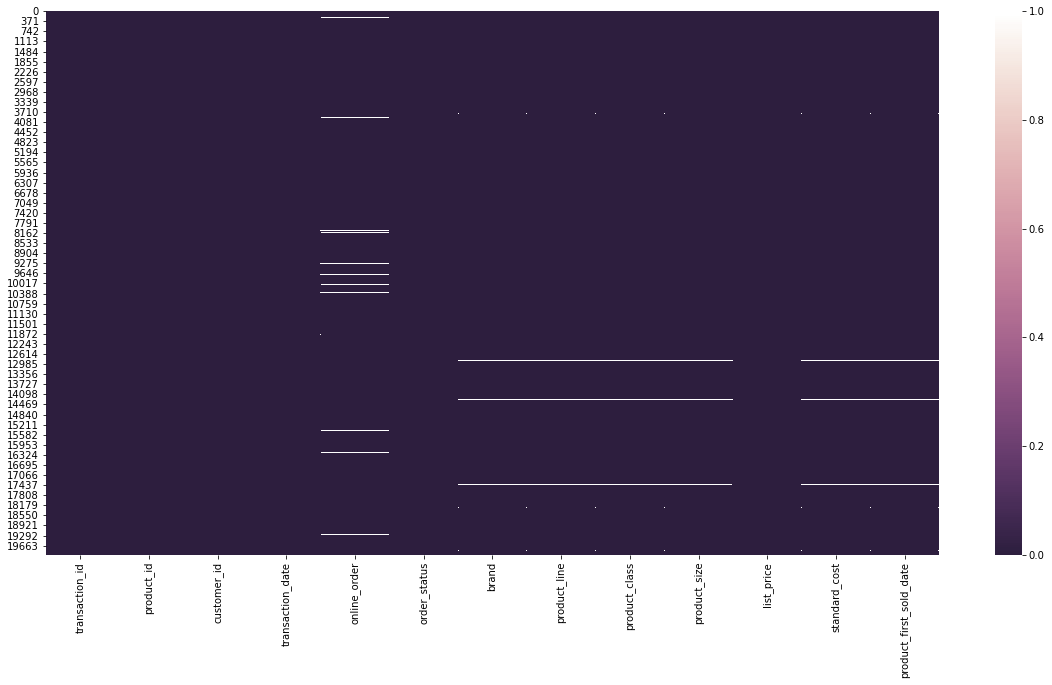

In [8]:
# resize plot figure
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(TransDf.isnull(), cmap=cmap)
#There are some MISSING Data most of them are in online_order

In [9]:
#identify missing value
TransDf.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [10]:
total = TransDf.isnull().sum()
pct = total/TransDf.isnull().count()
NAs = pd.concat([total,pct],axis=1,keys=('Total','Pct'))
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)


#we can see here that the missing values are very few ,so we will
#impute them using backfill/frontfill pad method in python 
#or we can simply delete these values (the percentage is less than 0.01). 


,Total,Pct
online_order,360,0.01800
brand,197,0.00985
product_line,197,0.00985
product_class,197,0.00985
product_size,197,0.00985
standard_cost,197,0.00985
product_first_sold_date,197,0.00985


In [11]:
TransDf['brand'].value_counts().isnull()


#we can see here that the missing values are very few ,so we will
#impute them using backfill/frontfill pad method in python 
#or we can simply delete these values (the percentage is less than 0.01). 


Solex             False
Giant Bicycles    False
WeareA2B          False
OHM Cycles        False
Trek Bicycles     False
Norco Bicycles    False
Name: brand, dtype: bool

Before removing any values we should see if the removing of missing values will not affect the behavior of the dataset. first we will count number of values in each feature(that has mising values) before removing the missing values and after (and also to asume that the missing values are randomly disturbited )

In [12]:
print(TransDf['online_order'].value_counts())
print("____________________________________")
print(TransDf['brand'].value_counts())
print("____________________________________")

print(TransDf['product_line'].value_counts())
print("____________________________________")

print(TransDf['product_class'].value_counts())
print("____________________________________")

print(TransDf['product_size'].value_counts())
print("____________________________________")

print(TransDf['standard_cost'].value_counts())
print("____________________________________")

print(TransDf['product_first_sold_date'].value_counts())

1.0    9829
0.0    9811
Name: online_order, dtype: int64
____________________________________
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64
____________________________________
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64
____________________________________
medium    13826
high       3013
low        2964
Name: product_class, dtype: int64
____________________________________
medium    12990
large      3976
small      2837
Name: product_size, dtype: int64
____________________________________
388.920000    465
954.820000    396
53.620000     274
161.600000    235
260.140000    233
             ... 
151.960000    124
206.350000    114
270.299988      1
667.400024      1
312.735016      1
Name: standard_cost, Length: 103, dtype: int64
____________________________________
1970-01-01 09:24:39    234
1970-01-01 11:24:

In [13]:
# making new data frame with dropped NA values  
new_data = TransDf.dropna(axis = 0, how ='any')  
new_data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56


In [14]:
print(new_data['online_order'].value_counts())
print("____________________________________")
print(new_data['brand'].value_counts())
print("____________________________________")

print(new_data['product_line'].value_counts())
print("____________________________________")

print(new_data['product_class'].value_counts())
print("____________________________________")

print(new_data['product_size'].value_counts())
print("____________________________________")

print(new_data['standard_cost'].value_counts())
print("____________________________________")

print(new_data['product_first_sold_date'].value_counts())

1.0    9739
0.0    9706
Name: online_order, dtype: int64
____________________________________
Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64
____________________________________
Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64
____________________________________
medium    13587
high       2952
low        2906
Name: product_class, dtype: int64
____________________________________
medium    12767
large      3900
small      2778
Name: product_size, dtype: int64
____________________________________
388.920000    460
954.820000    389
53.620000     269
161.600000    232
260.140000    230
             ... 
151.960000    123
206.350000    111
270.299988      1
312.735016      1
667.400024      1
Name: standard_cost, Length: 103, dtype: int64
____________________________________
1970-01-01 09:24:39    230
1970-01-01 11:24:

so the missing values are randomly distributed, and removing these data is safe and doesn't affect the behaviour and balance of columns

In [15]:
new_data.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [16]:
TransDf=new_data
TransDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

OUTLIER ANALYSIS 

In [17]:


#here we are going to use Statistical theory to observe the outliers

for cat in ['product_id','customer_id','list_price','standard_cost']:
    Q3, Q1 = np.percentile(TransDf[cat], [75, 25])
    print('___________________________________________________')
    print(cat)
    print('___________________________________________________')
    print('Q1=',Q1)
    print('Q3=',Q3)
    IQR = Q3 - Q1
    print('IQR:',IQR)
    print('Interval:[', TransDf[cat].mean() - 3*IQR,'&',TransDf[cat].mean() + 3*IQR,']')
    print('min=',TransDf[cat].min())
    print('max=',TransDf[cat].max())

___________________________________________________
product_id
___________________________________________________
Q1= 18.0
Q3= 72.0
IQR: 54.0
Interval:[ -116.20226279249164 & 207.79773720750836 ]
min= 0
max= 100
___________________________________________________
customer_id
___________________________________________________
Q1= 857.0
Q3= 2615.0
IQR: 1758.0
Interval:[ -3534.5327333504756 & 7013.467266649524 ]
min= 1
max= 5034
___________________________________________________
list_price
___________________________________________________
Q1= 575.27
Q3= 1635.3
IQR: 1060.03
Interval:[ -2072.752806891206 & 4287.427193108794 ]
min= 12.01
max= 2091.47
___________________________________________________
standard_cost
___________________________________________________
Q1= 215.14
Q3= 795.1
IQR: 579.96
Interval:[ -1184.2947397774071 & 2295.4652602225933 ]
min= 7.21
max= 1759.85


the min and max are included in the interval ,so no outliers

now we will use the Tyrkey method(outlier are less than Q1-1.5IQR and greater than Q3+1.5IQR)

The Boxplot is graphical representation that use the turkey method:


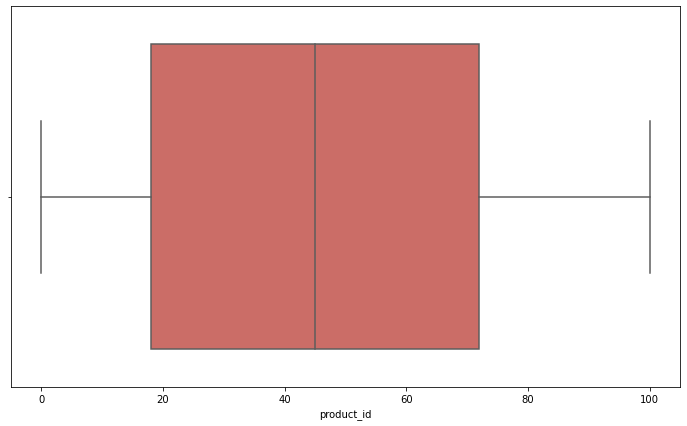

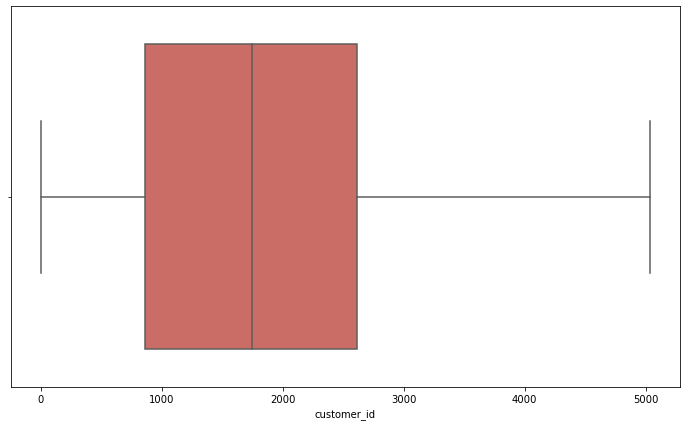

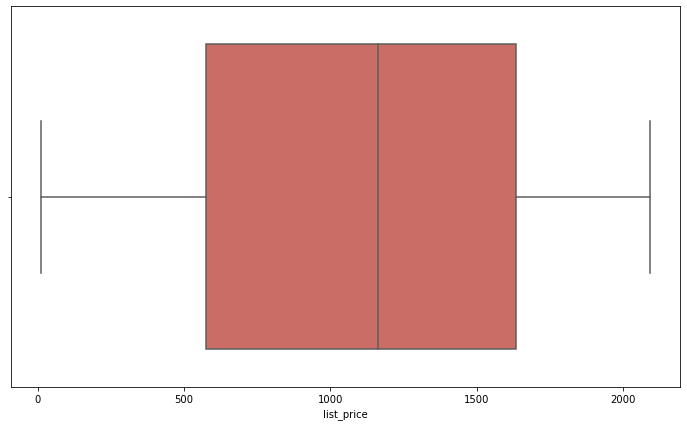

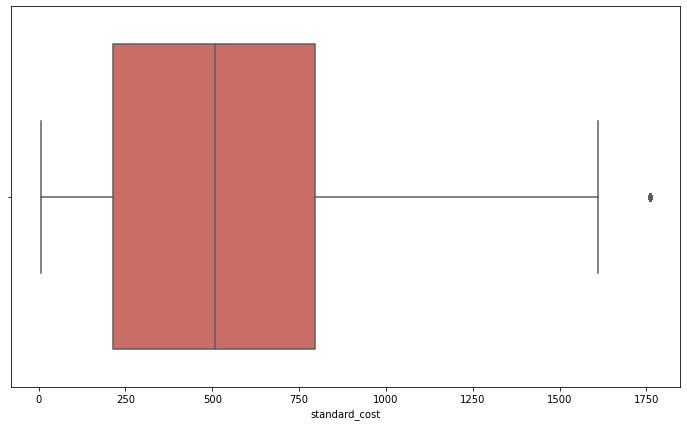

In [18]:

#the boxplot() use the turkey method (outlier are less than Q1-1.5IQR and greater than Q3+1.5IQR)
for cat in ['product_id','customer_id','list_price','standard_cost']:
    plt.figure(figsize=(12,7))
    sns.boxplot(x=cat,data=TransDf,palette='hls');
#so typicly we have no outliers , except in standar_cost



    

In [19]:


#outliers according to Turkey method 
for cat in ['product_id','customer_id','list_price','standard_cost']:
    Q3, Q1 = np.percentile(TransDf[cat], [75, 25])
    print('___________________________________________________')
    print(cat)
    print('___________________________________________________')
    print('Q1=',Q1)
    print('Q3=',Q3)
    IQR = Q3 - Q1
    print('IQR:',IQR)
    print('Interval:[', Q1 - 1.5*IQR,'&',Q3+ 1.5*IQR,']')
    print('min=',TransDf[cat].min())
    print('max=',TransDf[cat].max())

___________________________________________________
product_id
___________________________________________________
Q1= 18.0
Q3= 72.0
IQR: 54.0
Interval:[ -63.0 & 153.0 ]
min= 0
max= 100
___________________________________________________
customer_id
___________________________________________________
Q1= 857.0
Q3= 2615.0
IQR: 1758.0
Interval:[ -1780.0 & 5252.0 ]
min= 1
max= 5034
___________________________________________________
list_price
___________________________________________________
Q1= 575.27
Q3= 1635.3
IQR: 1060.03
Interval:[ -1014.7750000000001 & 3225.3450000000003 ]
min= 12.01
max= 2091.47
___________________________________________________
standard_cost
___________________________________________________
Q1= 215.14
Q3= 795.1
IQR: 579.96
Interval:[ -654.8000000000001 & 1665.04 ]
min= 7.21
max= 1759.85


In [20]:
(TransDf.standard_cost>=1665.04).sum()
#the oulier here represnt around 0.009% of the total record, at the moment we will keep the data with these outliers
#and we will see if we should remove it or not(depending on the study)


189

Exploring New Customer List Dataset

In [21]:
CustomerDf = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')

In [22]:
CustomerDf

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.46,0.5750,0.71875,0.610938,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.93,0.9300,1.16250,0.988125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.87,0.8700,0.87000,0.870000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.92,1.1500,1.15000,1.150000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.75,0.7500,0.93750,0.937500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.72,0.7200,0.72000,0.720000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.75,0.7500,0.93750,0.796875,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.71,0.8875,0.88750,0.887500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.95,1.1875,1.18750,1.009375,997,997,0.357000


In [23]:
CustomerDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

there are 5 unnamed columns , at the moment we can only drop these columns

In [24]:
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
CustomerDf = CustomerDf.drop(cols, axis=1)

In [25]:
CustomerDf.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [26]:
#total number of missing values
CustomerDf.isnull().sum().sum()

317

we can't drop these missing values (317/1000 =0.3), we should use impute these missing values for the column 'last name' we can replace nulls value with "not_defined" or recheck these information for other columns(job_title,job_industry_category,DOB) we can use simple imputation(such as backfill)or machine learning method(KNN imputation for example)

In [27]:
# Checking for duplicate values
CustomerDf.duplicated().sum()

0

In [28]:
for col in CustomerDf.columns:
 print(CustomerDf[col].value_counts())
 print('__________________________')

Dorian      3
Mandie      3
Rozamond    3
Tannie      2
Laurie      2
           ..
Evered      1
Cazzie      1
Eleonora    1
Ashby       1
Markus      1
Name: first_name, Length: 940, dtype: int64
__________________________
Shoesmith    2
Crellim      2
Minshall     2
Borsi        2
Sturch       2
            ..
Sturgeon     1
Lars         1
Crooke       1
Kibble       1
Mangion      1
Name: last_name, Length: 961, dtype: int64
__________________________
Female    513
Male      470
U          17
Name: gender, dtype: int64
__________________________
60    20
59    18
70    17
42    17
37    16
      ..
19     5
9      5
92     5
85     4
20     3
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64
__________________________
1961-07-31    2
1994-04-15    2
1987-01-15    2
1951-11-28    2
1979-07-28    2
             ..
1947-04-21    1
1995-10-10    1
1964-08-23    1
1962-05-12    1
1958-04-21    1
Name: DOB, Length: 958, dtype: int64
__________________________
Associate

In [29]:
#in the gender columns we will change U to Unspecified'
CustomerDf['gender']=CustomerDf['gender'].str.replace('U','Unspecified')


In [30]:
 print(CustomerDf['gender'].value_counts())


Female         513
Male           470
Unspecified     17
Name: gender, dtype: int64


In [31]:
CustomerDf.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [32]:
CustomerDf['DOB'].min()

Timestamp('1938-06-08 00:00:00')

In [33]:
CustomerDf['DOB'].max()


Timestamp('2002-02-27 00:00:00')

Customer Demographic Dataset

In [34]:
DemographicDf = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')

DemographicDf

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [35]:
DemographicDf['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
<img src=x onerror=alert('hi') />          31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

Values in the "default" column are not correct, we would drop the column

In [36]:
DemographicDf= DemographicDf.drop('default', axis=1)
DemographicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [37]:
DemographicDf['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [38]:
#The column has inconsistent values, we need to replace inconsistent values with appropriate values

DemographicDf['gender'] = DemographicDf['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')
DemographicDf['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [39]:
DemographicDf.isna().sum()
#there are some missing data 
#for last_name we can impute null values as "not-definied", for job_industry_category and job_title we can
#impute null values (missing) with "not definied" ,for "tenure" and "dob" we can use the backfill/frontfill 
#or replacing the missing values with the mean(in tenure)

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

Customer Adress Datasets

In [40]:
AddressDf = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress')
AddressDf

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [56]:
AddressDf.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [57]:
AddressDf.duplicated().sum()

0

here in the address dataset, there are 3999 records ,in the customer demographic dataset there are 4000 for customers (id:4003,4002,4001 we have their adress but we don't have their demographic information ) for customer (id :3 we don't have his adress ) since we have these problems only with these 4 customers, we will make an inner merge

In [42]:
customer_demographic = pd.merge(DemographicDf, AddressDf,how='inner',on='customer_id')

In [43]:
customer_demographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,0 Transport Center,3977,VIC,Australia,6
3992,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,4 Dovetail Crossing,2350,NSW,Australia,2
3993,3998,Sarene,Woolley,Unspecified,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN,736 Roxbury Junction,2540,NSW,Australia,6
3994,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,1482 Hauk Trail,3064,VIC,Australia,3


now we need to merge the new cutomerDemographic dataset with CustomerDf(the new customer list dataset)

In [44]:
TransDf.customer_id.min()

1

In [45]:
TransDf.customer_id.max()


5034

In [46]:
customer_demographic.customer_id.min()

1

In [47]:
customer_demographic.customer_id.max()

4000

the  CustomerDf (which is the new cutomers list )have  1000 cutomers (no id)

the customer demographic dataset has 4000 cutomers(these are the old cutomers)


In [48]:
pd.merge(CustomerDf,customer_demographic,on=['first_name','last_name','DOB'])

,first_name,last_name,gender_x,past_3_years_bike_related_purchases_x,DOB,job_title_x,job_industry_category_x,wealth_segment_x,deceased_indicator_x,owns_car_x,...,job_industry_category_y,wealth_segment_y,deceased_indicator_y,owns_car_y,tenure_y,address_y,postcode_y,state_y,country_y,property_valuation_y


no similar records between newcustomerlist and customerdemographic(old customer)
so the demographic information for all  new customers in the newcustomerlist(customerDf) are missing
we can't do the customer demographic study with the new customers(and also we can't merge it since the customer-id is missing in the new customer_list


solution:
we can numerate(id) new customers from 4001 to 5001 and then merge the three dataframes

Note: since there is no information in Transaction dataset about customer 3500 and 5034 , we don't have to use this solution and at the moment we should merge only Customer demographic dataset with Transcation dataset

In [49]:
TransDf.sort_values('customer_id',ascending=False).head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,1970-01-01 11:43:38
16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,1970-01-01 09:54:27
17468,17469,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,1970-01-01 09:24:39
14869,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.260000,1970-01-01 09:29:25
8415,8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.910000,1970-01-01 10:11:08
2462,2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,1970-01-01 11:27:25
8561,8562,33,3500,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.180000,1970-01-01 09:24:48
19835,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.900000,1970-01-01 10:45:50
6308,6309,69,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.680000,1970-01-01 09:24:39
7385,7386,57,3499,2017-03-01,1.0,Approved,WeareA2B,Touring,medium,large,1890.39,260.140000,1970-01-01 09:29:03


In [50]:
Data = pd.merge(customer_demographic, TransDf,how='inner',on='customer_id')

In [51]:
Data

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 10:58:46
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01 10:30:23
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01 10:31:13
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 10:42:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19411,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,1970-01-01 09:24:39
19412,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,1970-01-01 10:11:08
19413,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1970-01-01 09:24:48
19414,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1970-01-01 09:29:25


In [52]:
#identify missing value
Data.isnull().sum()

#job title and category has lot of missing data

customer_id                               0
first_name                                0
last_name                               626
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     430
job_title                              2302
job_industry_category                  3129
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  430
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                              0
order_status                              0
brand                           

In [53]:
total = Data.isnull().sum()
pct = total/Data.isnull().count()
NAs = pd.concat([total,pct],axis=1,keys=('Total','Pct'))
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)


#as we can see here the missing data of job title and category represent only 0.1% we can simply remove these data


,Total,Pct
job_industry_category,3129,0.161156
job_title,2302,0.118562
last_name,626,0.032241
DOB,430,0.022147
tenure,430,0.022147


In [54]:
# making new data frame with dropped NA values  
Data2 = Data.dropna(axis = 0, how ='any')  
Data2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 10:58:46
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01 10:30:23
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01 10:31:13
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 10:42:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19392,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2017-03-07,0.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,1970-01-01 10:27:39
19393,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2017-04-02,1.0,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,1970-01-01 11:11:43
19394,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,2017-11-08,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,1970-01-01 11:51:28
19395,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,2017-09-01,1.0,Approved,Solex,Standard,medium,medium,575.27,431.45,1970-01-01 09:46:00


In [55]:
(len(Data)-len(Data2))/len(Data)#(only 0.2% are removed)

0.2976926246394726